In [44]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [45]:
Data = pd.read_csv("C:\\Datasets\\diamonds.csv")
Data.drop(columns=['Unnamed: 0','x','y','z'], inplace=True)
Data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [57]:
print(Data.shape, '\n')
Data.info()

(53940, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [47]:
Data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# getting feature and target out
X = Data.drop(columns=['cut'])
y = Data['cut']
# y

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42)

# preprocessing target
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# y

# preprocessing  features
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat',cat_transformer, cat_features)])

# creating pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier())])

# training
pipeline.fit(Xtrain,ytrain)

# prediction
y_pred = pipeline.predict(Xtest)
# print('prediction:', y_pred)
# print('actual:', ytest)

score = pipeline.score(Xtrain, ytrain)
print('score:', score)

report = classification_report(ytest, y_pred)
print(report)



score: 0.9987254356692622
              precision    recall  f1-score   support

        Fair       0.90      0.89      0.89       335
        Good       0.69      0.64      0.66      1004
       Ideal       0.82      0.91      0.86      4292
     Premium       0.66      0.73      0.69      2775
   Very Good       0.52      0.37      0.44      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.71      0.71     10788
weighted avg       0.70      0.72      0.71     10788



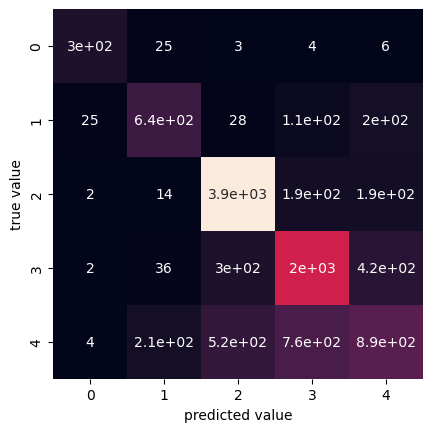

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');